In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('/Users/devanshdhingra/Desktop/Retail-Performance-Analysis-Python-Excel-Tableau/data/raw/Order 2017.csv',
                     encoding='latin1',
                    low_memory=False
)
returns=pd.read_csv('../data/raw/Returns.csv')
managers= pd.read_csv('../data/raw/Managers.csv')

print("Orders Shape:", orders.shape)
print("Returns Shape:", returns.shape)
print("Managers Shape:", managers.shape)

orders.head()

Orders Shape: (3312, 21)
Returns Shape: (296, 2)
Managers Shape: (4, 2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,849,CA-2017-107503,01-01-2017,06-01-2017,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,4010,CA-2017-144463,01-01-2017,05-01-2017,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,6683,CA-2017-154466,01-01-2017,02-01-2017,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,...,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,8070,CA-2017-151750,01-01-2017,05-01-2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,8071,CA-2017-151750,01-01-2017,05-01-2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [3]:
orders.info()
orders.describe()
orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         3312 non-null   int64  
 1   Order ID       3312 non-null   object 
 2   Order Date     3312 non-null   object 
 3   Ship Date      3312 non-null   object 
 4   Ship Mode      3312 non-null   object 
 5   Customer ID    3312 non-null   object 
 6   Customer Name  3312 non-null   object 
 7   Segment        3312 non-null   object 
 8   Country        3312 non-null   object 
 9   City           3312 non-null   object 
 10  State          3312 non-null   object 
 11  Postal Code    3312 non-null   int64  
 12  Region         3312 non-null   object 
 13  Product ID     3312 non-null   object 
 14  Category       3312 non-null   object 
 15  Sub-Category   3312 non-null   object 
 16  Product Name   3312 non-null   object 
 17  Sales          3312 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
orders = orders.drop_duplicates()

In [5]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'],    
                                      dayfirst=True
)
orders['Ship Date'] = pd.to_datetime(orders['Ship Date'],    
                                     dayfirst=True
)

In [6]:
orders['Year'] = orders['Order Date'].dt.year
orders['Month'] = orders['Order Date'].dt.month
orders['Month Name'] = orders['Order Date'].dt.month_name()

In [7]:
orders['Profit Margin'] = orders['Profit'] / orders['Sales']

In [8]:
orders['Shipping Days'] = (orders['Ship Date'] - orders['Order Date']).dt.days

In [9]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month Name,Profit Margin,Shipping Days
0,849,CA-2017-107503,2017-01-01,2017-01-06,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,2017,1,January,0.1750,5
1,4010,CA-2017-144463,2017-01-01,2017-01-05,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,2017,1,January,0.4200,4
2,6683,CA-2017-154466,2017-01-01,2017-01-02,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,...,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,2017,1,January,0.4800,1
3,8070,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,2017,1,January,-0.2375,4
4,8071,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,2017,1,January,-1.3250,4


In [10]:
orders_returns = orders.merge(
    returns,
    on='Order ID',
    how='left'
)
orders_returns['Returned'] = orders_returns['Returned'].fillna('No')

In [11]:
final_data = orders_returns.merge(
    managers,
    on='Region',
    how='left'
)

final_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Year,Month,Month Name,Profit Margin,Shipping Days,Returned,Person
0,849,CA-2017-107503,2017-01-01,2017-01-06,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,4,0.2,8.5568,2017,1,January,0.1750,5,No,Chuck Magee
1,4010,CA-2017-144463,2017-01-01,2017-01-05,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,11,0.0,199.2606,2017,1,January,0.4200,4,No,Anna Andreadi
2,6683,CA-2017-154466,2017-01-01,2017-01-02,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,...,2,0.0,1.7280,2017,1,January,0.4800,1,No,Kelly Williams
3,8070,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,5,0.2,-107.9580,2017,1,January,-0.2375,4,No,Kelly Williams
4,8071,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,5,0.6,-187.3815,2017,1,January,-1.3250,4,No,Kelly Williams


In [12]:
print("Total Sales:", final_data['Sales'].sum())
print("Total Profit:", final_data['Profit'].sum())

Total Sales: 733215.2552
Total Profit: 93439.2696


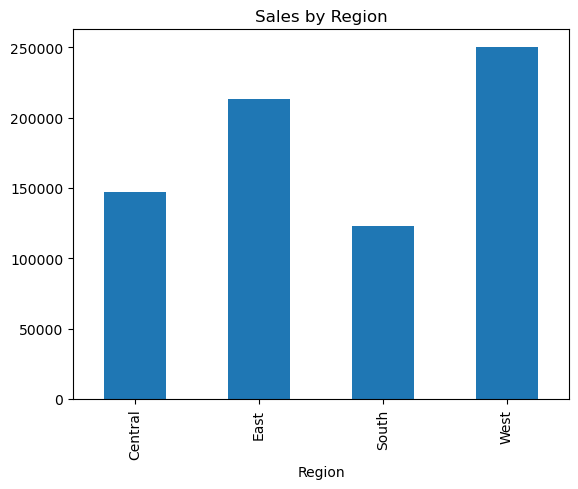

In [13]:
region_sales = final_data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.show()

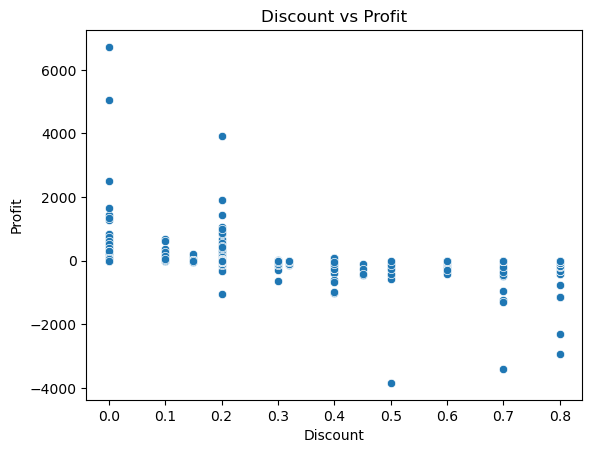

In [14]:
sns.scatterplot(data=final_data, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()

In [15]:
final_data.to_csv('cleaned_superstore.csv', index=False)